<a href="https://colab.research.google.com/github/Favisoki/hdsc-2021/blob/main/HDSC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HAMOYE DATA SCIENCE INTERNSHIP STAGE 1

## Data wrangling with python

In [23]:
# import necessary libraries
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('Good to go!')

Good to go!


In [24]:
#pull the data
data = pd.read_csv('http://bit.ly/HDSC-Dataset', index_col='report_year', parse_dates=True)
data.head()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994-01-01,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1994-01-01,f1_fuel_1994_12_1_0_10,1,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
1994-01-01,f1_fuel_1994_12_2_0_1,2,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
1994-01-01,f1_fuel_1994_12_2_0_7,2,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
1994-01-01,f1_fuel_1994_12_2_0_10,2,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


 ### General summary/description of the data

In [25]:
data.describe()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [26]:
#check which column has null or empty cells
 
data.isnull().any()

record_id                       False
utility_id_ferc1                False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [27]:
#counting the sum of each value in fuel_unit
data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [28]:
# create a copy of the data to ensure the original is kept
df = data.copy()
df.head()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994-01-01,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1994-01-01,f1_fuel_1994_12_1_0_10,1,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
1994-01-01,f1_fuel_1994_12_2_0_1,2,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
1994-01-01,f1_fuel_1994_12_2_0_7,2,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
1994-01-01,f1_fuel_1994_12_2_0_10,2,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [29]:
# check the shape of the data
df.shape #prints (29523, 11), the data has 29523 rows and 11 columns

(29523, 10)

In [30]:
# skewness of some columns
cols = ['fuel_qty_burned', 'fuel_cost_per_mmbtu']
for col in cols:
  skewness = df[col].skew()
  kurtosis = df[col].kurt()
  print('Skewness of column ' + col + "\n " + str(skewness))
  print('-----' * 4)
  print('Kurtosis of column ' + col + "\n " + str(kurtosis))
  print('-----' * 5)

Skewness of column fuel_qty_burned
 15.851495469109503
--------------------
Kurtosis of column fuel_qty_burned
 651.3694501337732
-------------------------
Skewness of column fuel_cost_per_mmbtu
 171.6755346142092
--------------------
Kurtosis of column fuel_cost_per_mmbtu
 29489.132593830782
-------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

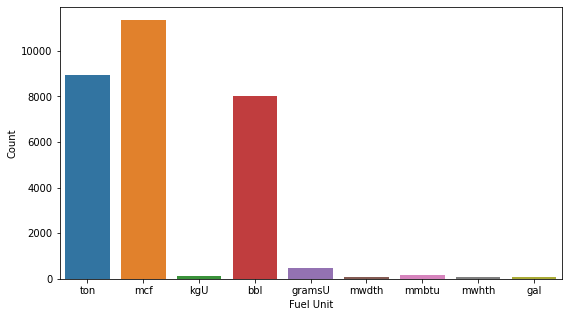

In [31]:
# barchart showing the frequency of each value in the fuel unit column
plt.figure(figsize=(9,5))
sns.countplot(df['fuel_unit'])
# set xlabel
plt.xlabel('Fuel Unit')
# set ylabel
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

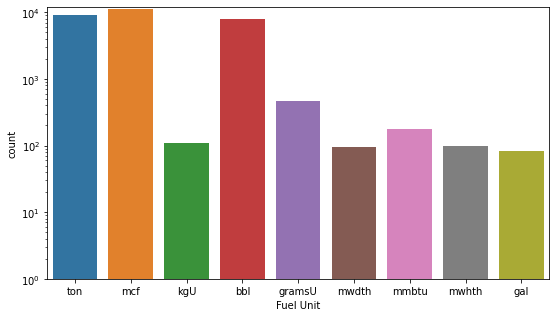

In [32]:
# due to the large range of values for the fuel_unit
#the chart can be simplified by plotting the logarithm of the y-axis

plt.figure(figsize=(9,5))
graph = sns.countplot(df['fuel_unit'])
# scale it to its logarithm
graph.set_yscale('log')
# set the highest value for y
graph.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')
plt.ylabel('count')

In [33]:
#the column 'fuel_unit' has empty cells
#let's get into more detail
 
# total number of null values
nulls = data['fuel_unit'].isnull().sum()

print(nulls)

180


In [34]:
# get the total number of each value in the column

counts = [df.groupby('fuel_unit')['fuel_unit'].count()]
counts

[fuel_unit
 bbl        7998
 gal          84
 gramsU      464
 kgU         110
 mcf       11354
 mmbtu       180
 mwdth        95
 mwhth       100
 ton        8958
 Name: fuel_unit, dtype: int64]

In [35]:
# mcf has the highest frequency in the data
# so the empty cells can be filled with this value

df[['fuel_unit']] = df[['fuel_unit']].fillna(value='mcf')

# check if missing values have been fixed
df['fuel_unit'].isnull().sum()

0

In [36]:
# group by the fuel type and print the first entries
# in all the groups formed
df.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


## Practice on merging data

In [37]:
df1 = df[:15000] # copy the first 15000 rows
df2 = df[15000:] # copy the remaining rows

# check the the length of both dataframes sum up to the original
assert len(df) == (len(df1) + len(df2))

In [38]:
# perform merge operations on the data

# inner merge will lose rows that do not match in both dataframes
# it will only return rows that match in both dataframes
df3 = pd.merge(df1, df2, how='inner')

# outer merge returns rows in both data frames
df4 = pd.merge(df1, df2, how='outer')

# left merge removes rows on the right that do not match with the left
# and keeps all rows on the left
df5 = pd.merge(df1, df2, how='left')

print(df3.shape)
print(df4.shape)
print(df5.shape)

(0, 10)
(29523, 10)
(15000, 10)


In [39]:
# check for duplicated data
df.duplicated().any()

False

In [40]:
#plt.figure(figsize=(10,6))
df.head()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994-01-01,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1994-01-01,f1_fuel_1994_12_1_0_10,1,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
1994-01-01,f1_fuel_1994_12_2_0_1,2,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
1994-01-01,f1_fuel_1994_12_2_0_7,2,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
1994-01-01,f1_fuel_1994_12_2_0_10,2,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [41]:
# numerical correlation matrix showing the correlation between each column
my_matrix = df.corr()
round(my_matrix,2)

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.00,-0.06,-0.07,-0.04,-0.02,0.01
fuel_qty_burned,-0.06,1.00,-0.08,-0.02,-0.00,-0.00
fuel_mmbtu_per_unit,-0.07,-0.08,1.00,-0.01,-0.01,-0.01
fuel_cost_per_unit_burned,-0.04,-0.02,-0.01,1.00,0.01,-0.00
fuel_cost_per_unit_delivered,-0.02,-0.00,-0.01,0.01,1.00,-0.00
fuel_cost_per_mmbtu,0.01,-0.00,-0.01,-0.00,-0.00,1.00


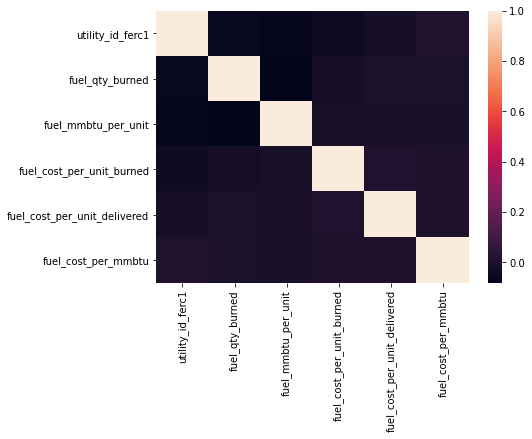

In [42]:
# correlation matrix in form of a heatmap
plt.figure(figsize = (7,5))
sns.heatmap(my_matrix)

Text(0.5, 0, 'Year')

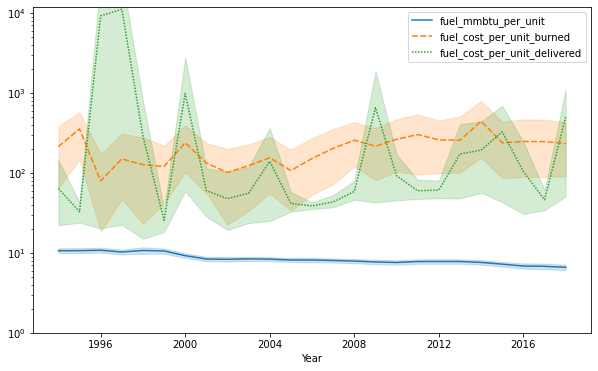

In [43]:
# line plot showing how the values changed over time
plt.figure(figsize=(10,6))
df1 = df.drop(columns=['fuel_qty_burned', 'fuel_cost_per_mmbtu', 'utility_id_ferc1'], axis=1)
line = sns.lineplot(data=df1)
line.set_yscale('log')
# set the highest value for y
line.set_ylim(1, 12000)
plt.xlabel('Year')

Text(0.5, 1.0, 'Change in fuel quantity burned')

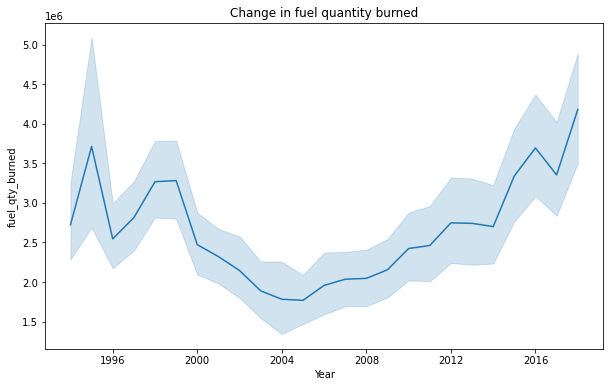

In [44]:
# plot showing how the quantity of fuel burned changed with time
plt.figure(figsize=(10,6))
qty_line = sns.lineplot(data=df['fuel_qty_burned'])
# set xlabel
plt.xlabel('Year')
plt.title('Change in fuel quantity burned')

Text(0.5, 0, 'Year')

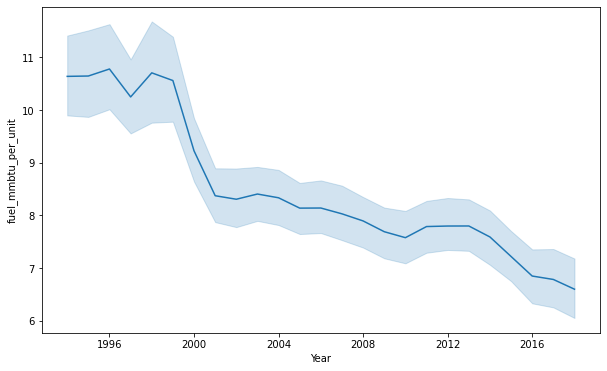

In [45]:
plt.figure(figsize=(10,6))
mmbtu_line = sns.lineplot(data=df['fuel_mmbtu_per_unit'])
# set xlabel
plt.xlabel('Year')

In [46]:
# the data is very long and can affect visualization
# solution: grab a sample of the data
my_sample = df.sample(n=150, random_state=4)
my_sample.shape

(150, 10)

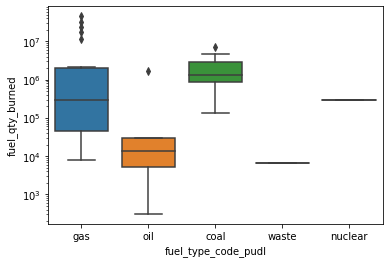

In [47]:
# a simple boxplot showing the distribution of fuel_type
# in relation to the fuel quantity burned
bx_plot = sns.boxplot(x='fuel_type_code_pudl', y='fuel_qty_burned', data = my_sample[:50])
bx_plot.set_yscale('log')

(1, 12000)

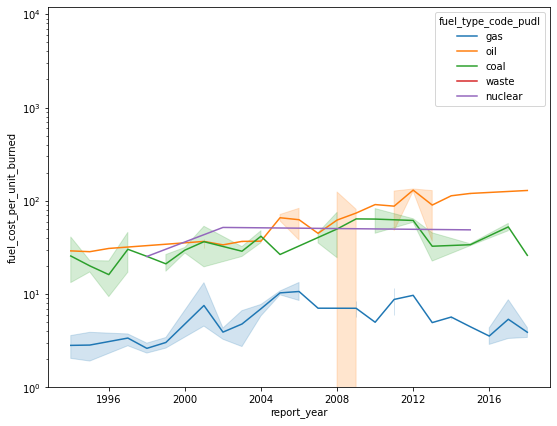

In [48]:
# yearly fuel cost per unit burned per fuel type
plt.figure(figsize=(9,7))
line_2 = sns.lineplot(y='fuel_cost_per_unit_burned', x='report_year', data=my_sample, hue=my_sample['fuel_type_code_pudl'])
line_2.set_yscale('log')
line_2.set_ylim(1, 12000)

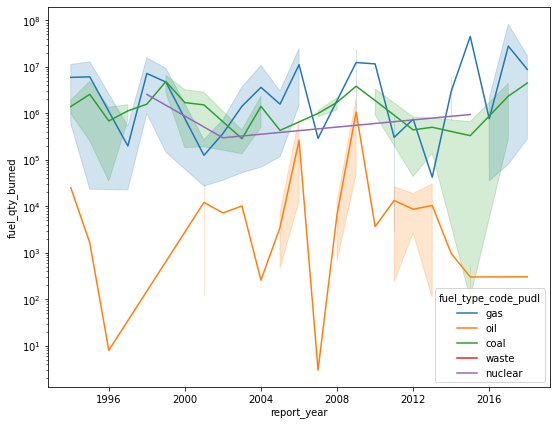

In [49]:
# yearly fuel cost per unit burned per fuel type
plt.figure(figsize=(9,7))
line_3 = sns.lineplot(y='fuel_qty_burned', x='report_year', data=my_sample, hue=my_sample['fuel_type_code_pudl'])
line_3.set_yscale('log')
# line_3.set_ylim(1, 12000)

(1, 1200)

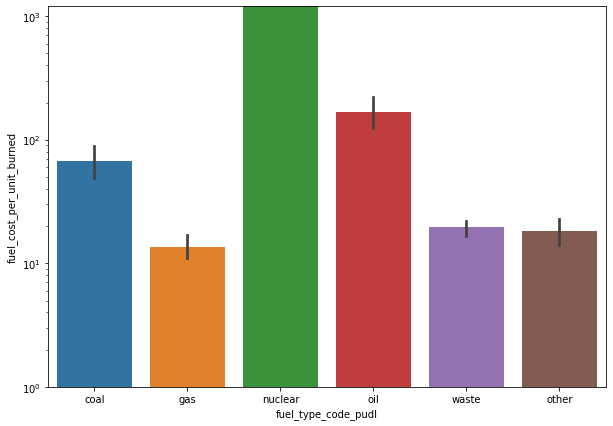

In [50]:
plt.figure(figsize=(10,7))
bar_1 = sns.barplot(y='fuel_cost_per_unit_burned', x='fuel_type_code_pudl', data=df)
bar_1.set_yscale('log')
bar_1.set_ylim(1, 1200)

# Some extra work on the data

In [51]:
for col in df:
  print(col + ' ' + str(df[col].dtype))

record_id object
utility_id_ferc1 int64
plant_name_ferc1 object
fuel_type_code_pudl object
fuel_unit object
fuel_qty_burned float64
fuel_mmbtu_per_unit float64
fuel_cost_per_unit_burned float64
fuel_cost_per_unit_delivered float64
fuel_cost_per_mmbtu float64


In [52]:
numeric_cols = [col for col in df if df[col].dtype in ['int64', 'float64']]
numeric_cols

['utility_id_ferc1',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

In [53]:
object_cols = [col for col in df if df[col].dtype == 'object']
object_cols

['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']

In [54]:
numeric_df = pd.read_csv('http://bit.ly/HDSC-Dataset')
numeric_df = numeric_df.drop(object_cols, axis=1)
numeric_df.head()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,40533.0,1.000,2.77,2.77,2.570


## Correlation Matrix

In [55]:
# numerical correlation matrix showing the correlation between each column
matrix = numeric_df.corr()
round(matrix,2)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.00,0.09,-0.06,-0.07,-0.04,-0.02,0.01
report_year,0.09,1.00,0.01,-0.11,0.01,-0.01,0.01
fuel_qty_burned,-0.06,0.01,1.00,-0.08,-0.02,-0.00,-0.00
fuel_mmbtu_per_unit,-0.07,-0.11,-0.08,1.00,-0.01,-0.01,-0.01
fuel_cost_per_unit_burned,-0.04,0.01,-0.02,-0.01,1.00,0.01,-0.00
fuel_cost_per_unit_delivered,-0.02,-0.01,-0.00,-0.01,0.01,1.00,-0.00
fuel_cost_per_mmbtu,0.01,0.01,-0.00,-0.01,-0.00,-0.00,1.00


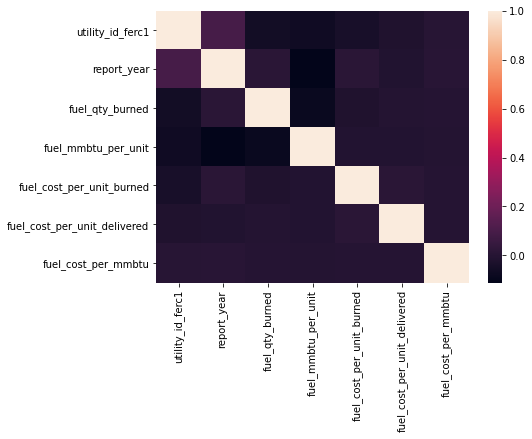

In [56]:
# correlation matrix in form of a heatmap
plt.figure(figsize = (7,5))
sns.heatmap(matrix)

In [57]:
from sklearn.preprocessing import MinMaxScaler

fuel_df = numeric_df.drop(columns=['utility_id_ferc1', 'report_year'])

scaler = MinMaxScaler()

for col in fuel_df.columns:
  fuel_df[[col]] = scaler.fit_transform(fuel_df[[col]])

fuel_df.head()

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0.009674,0.048614,0.002110,0.000112,0.000119
1,0.018865,0.048620,0.002110,0.000112,0.000119
2,0.005358,0.070709,0.002262,0.000115,0.000120
3,0.006727,0.070181,0.002315,0.000116,0.000121
4,0.000073,0.002930,0.001997,0.000110,0.000123


In [58]:
fuel_df.describe()

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000
mean,0.004717,0.024885,0.003471,0.000225,0.000169
std,0.016402,0.031062,0.020443,0.008634,0.005821
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000025,0.003001,0.002014,0.000110,0.000121
50%,0.000456,0.016887,0.002163,0.000112,0.000127
75%,0.002562,0.049833,0.002315,0.000115,0.000137
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = fuel_df.drop(columns='fuel_qty_burned')
y = fuel_df['fuel_qty_burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_train.head()

,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
8251,0.000045,0.002170,0.000113,0.000118
6306,0.002995,0.001994,0.000110,0.000122
24231,0.017107,0.002925,0.000126,0.000179
22184,0.003062,0.002033,0.000111,0.000136
12745,0.002933,0.001999,0.000110,0.000124


In [60]:
model = LinearRegression(n_jobs=3, fit_intercept=True, normalize=True)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(pred)

[0.00363847 0.00575286 0.00584606 ... 0.0058222  0.00508648 0.00581143]


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

m_error = mean_squared_error(pred, y_test)
print('Mean squared error: ', m_error)
r2 = r2_score(pred, y_test)
print('R2 Score: ', r2)

Mean squared error:  0.0014968325238438323
R2 Score:  -0.2666842227578592
